In [1]:
import pandas as pd
import json

In [12]:
import plotly.io as pio
pio.renderers.default = 'svg'

In [13]:
with open('results.json', 'r') as f:
    r = json.load(f)
    df = pd.DataFrame(r['benchmarks'])
    df = df[df['aggregate_name'] == 'mean']
    df['run_name'] = df['run_name'].apply(lambda x: x.split('/')[1])
    benchmarks = [y for x, y in df.groupby('run_name', as_index=False)]

In [14]:
import plotly.graph_objects as go
def plotly_bm(benchmark):
    colors1 = ['gray',] * len(benchmark)
    ts = benchmark.time_unit.iloc[0]

    colors2 = ['lightslategray',] * len(benchmark)

    fig = go.Figure(data=[go.Bar(
        x=benchmark.label,
        name=f'CPU',
        y=benchmark['cpu_time'],
        marker_color=colors1 # marker color can be a single color value or an iterable
    ), go.Bar(
        x=benchmark.label,
        name=f'Real',
        y=benchmark['real_time'],
        marker_color=colors2 # marker color can be a single color value or an iterable
    )])

    fig.update_layout(
        title=f'Pattern {benchmark.run_name.iloc[0]}',
        xaxis_tickfont_size=14,
        yaxis=dict(
            title=f'Time ({ts})',
            titlefont_size=16,
            tickfont_size=14,
        ),
        legend=dict(
            x=0,
            y=1.0,
            bgcolor='rgba(255, 255, 255, 0)',
            bordercolor='rgba(255, 255, 255, 0)'
        ),
        barmode='group',
        bargap=0.15, # gap between bars of adjacent location coordinates.
        bargroupgap=0.1 # gap between bars of the same location coordinate.
    )
    fig.show()

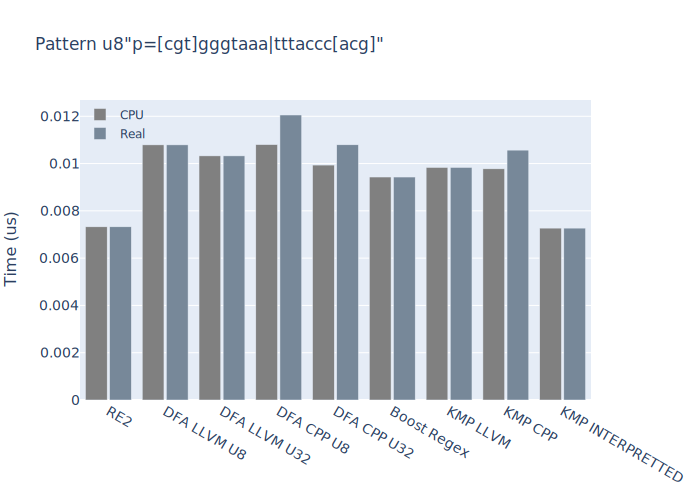

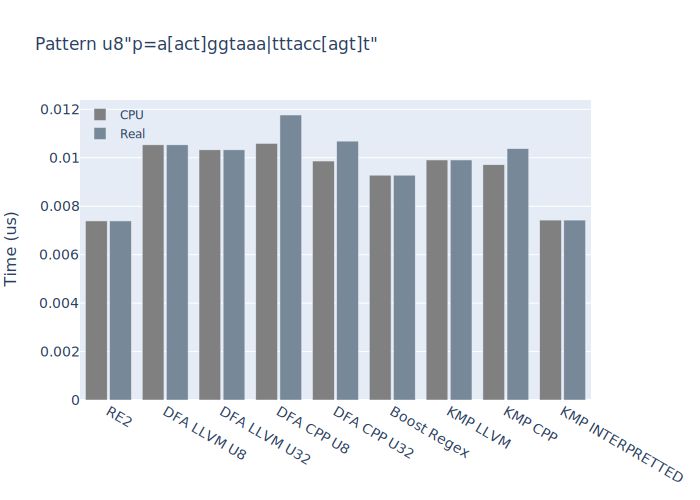

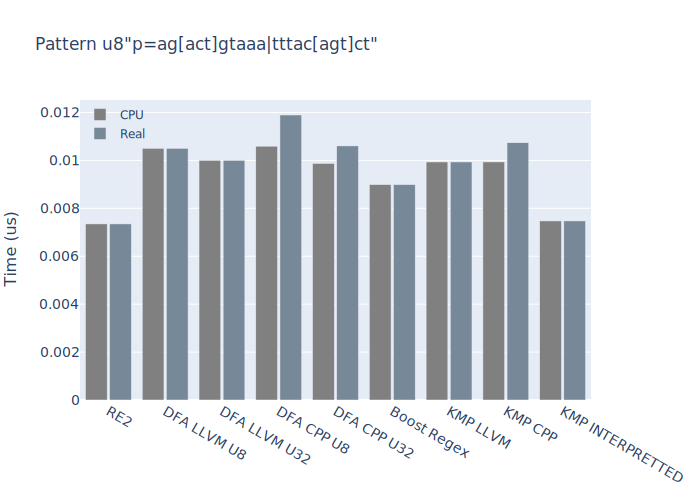

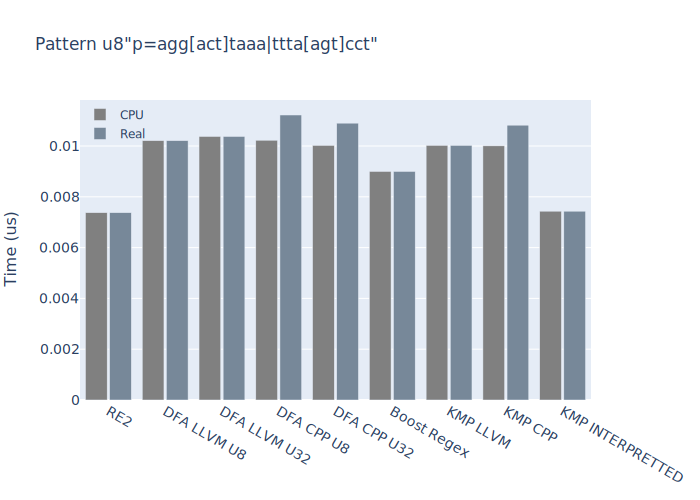

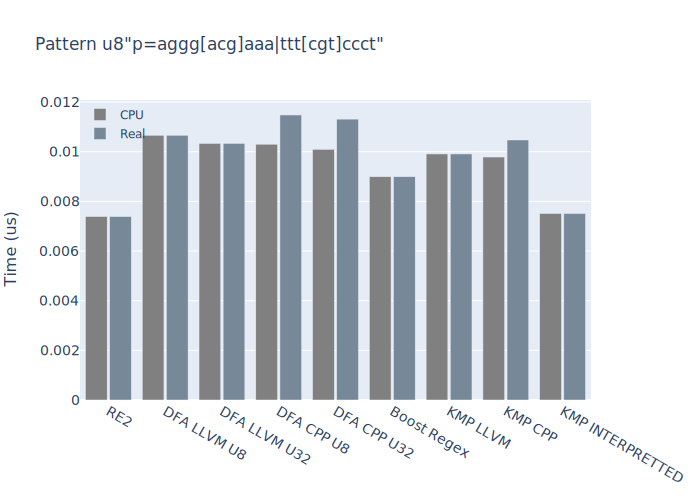

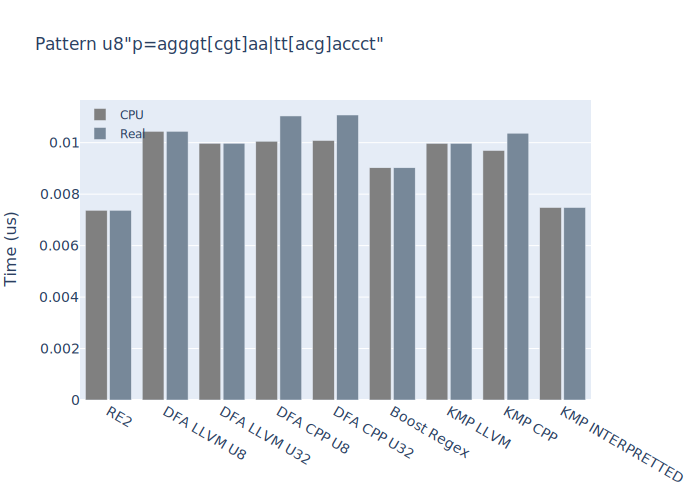

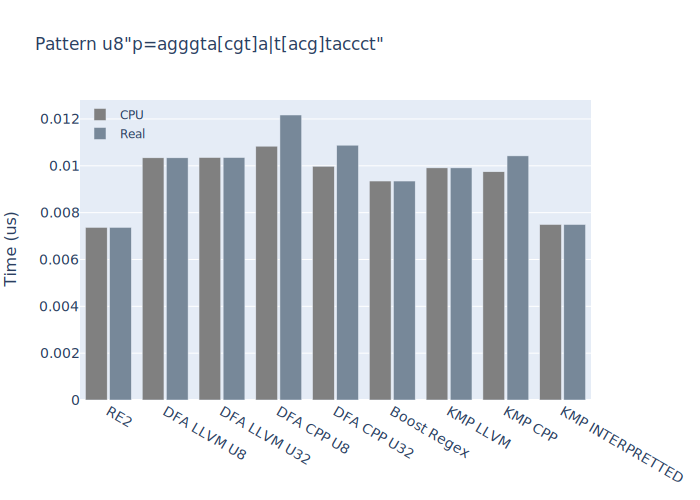

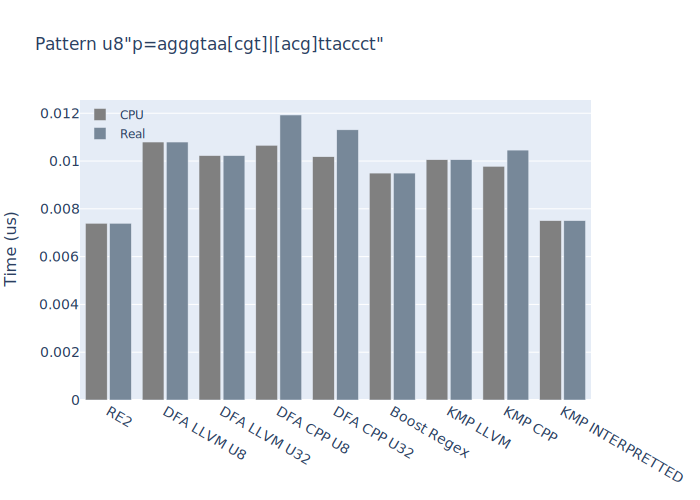

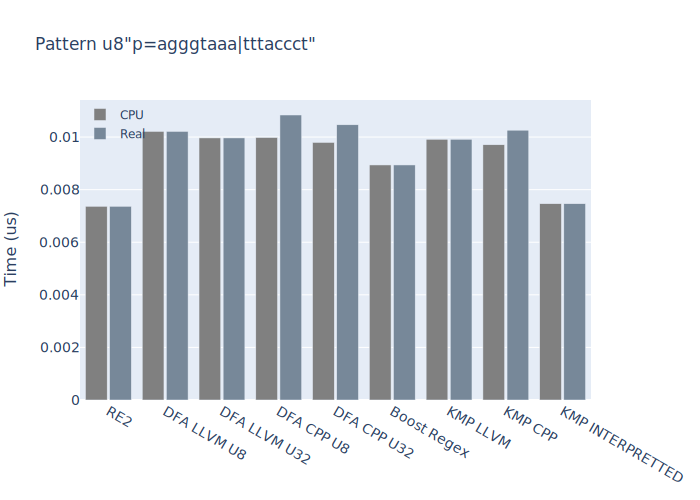

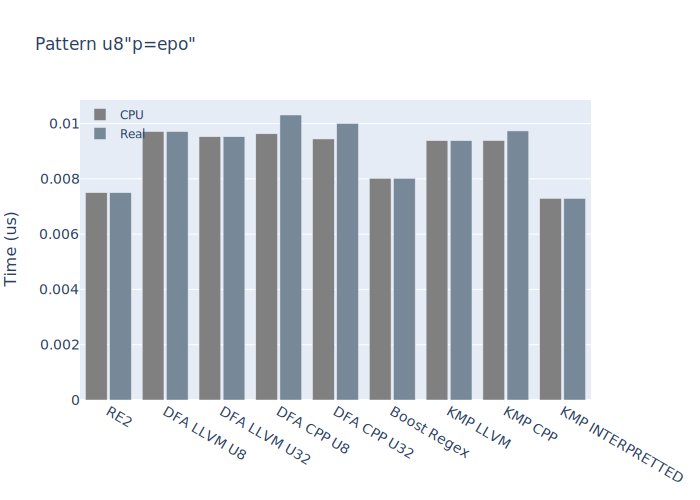

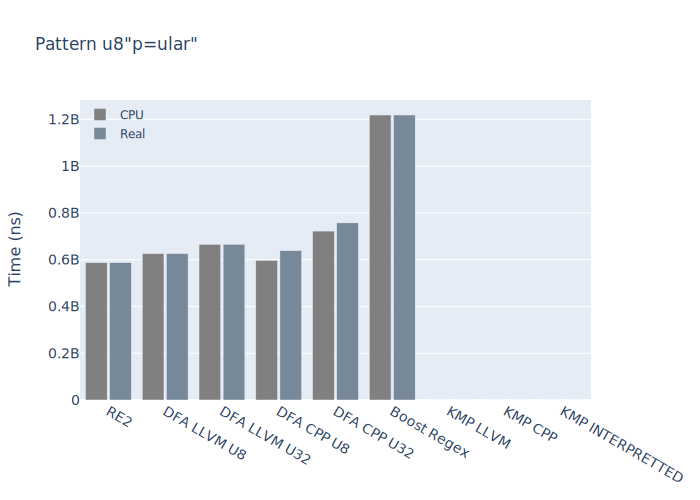

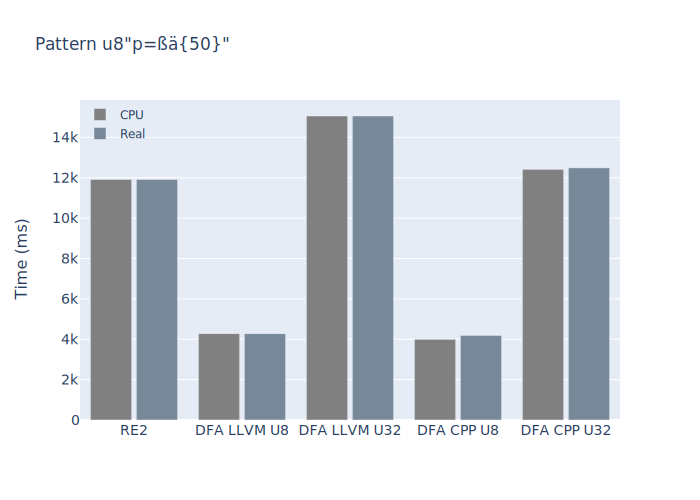

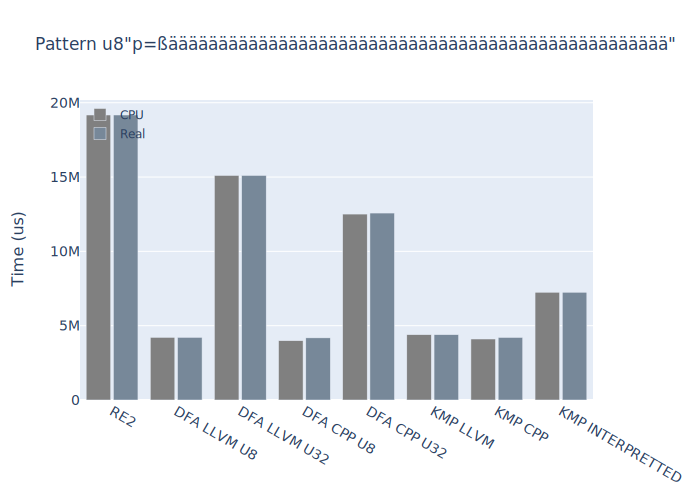

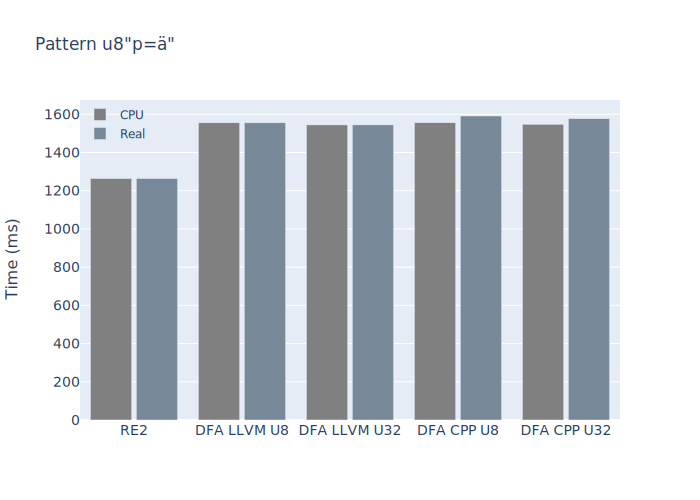

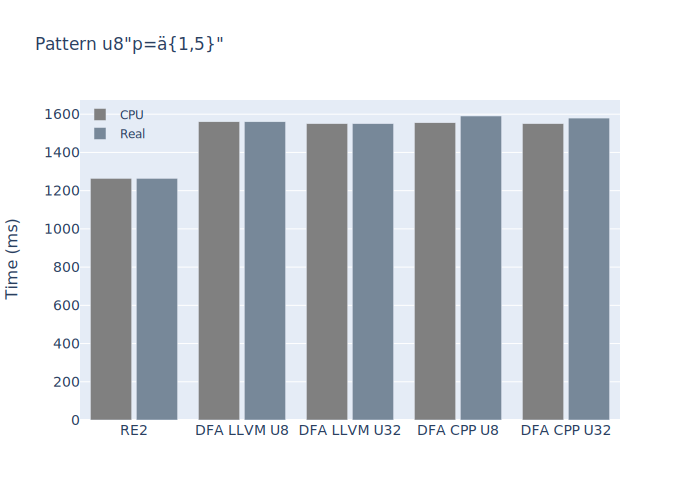

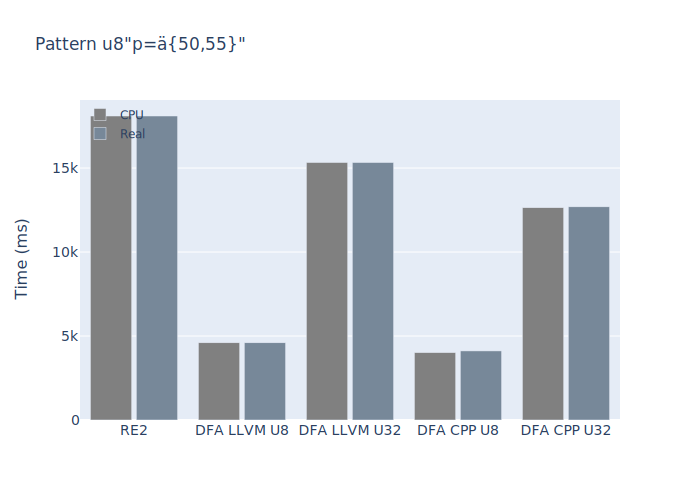

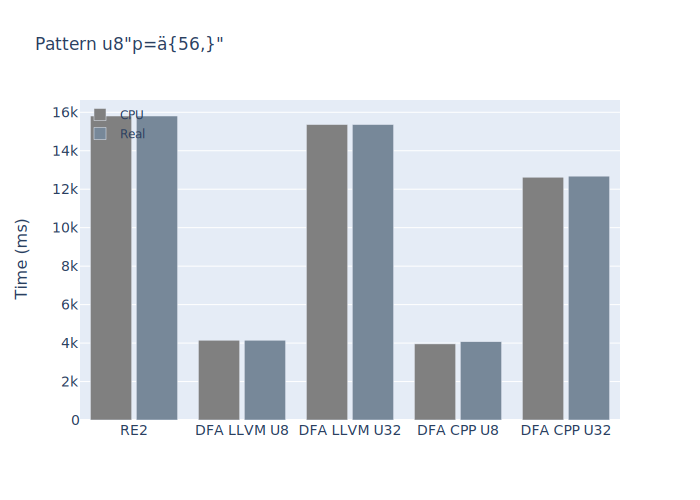

In [15]:
for benchmark in benchmarks:
    plotly_bm(benchmark)